Dataset loaded successfully!
Shape: (108040, 19)
   StationId        Date   PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0      AP001  2017-11-24   71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1      AP001  2017-11-25   81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2      AP001  2017-11-26   78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3      AP001  2017-11-27   88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4      AP001  2017-11-28   64.18  104.09  2.56  28.07  17.01  11.42  0.09   
5      AP001  2017-11-29   72.47  114.84  5.23  23.20  16.59  12.25  0.16   
6      AP001  2017-11-30   69.80  114.86  4.69  20.17  14.54  10.95  0.12   
7      AP001  2017-12-01   73.96  113.56  4.58  19.29  13.97  10.95  0.10   
8      AP001  2017-12-02   89.90  140.20  7.71  26.19  19.87  13.12  0.10   
9      AP001  2017-12-03   87.14  130.52  0.97  21.31  12.12  14.36  0.15   
10     AP001  2017-12-04   84.64  125.00  4.02  26.98  17.58  14.41  0.18   
11     AP001  2017-12-05   

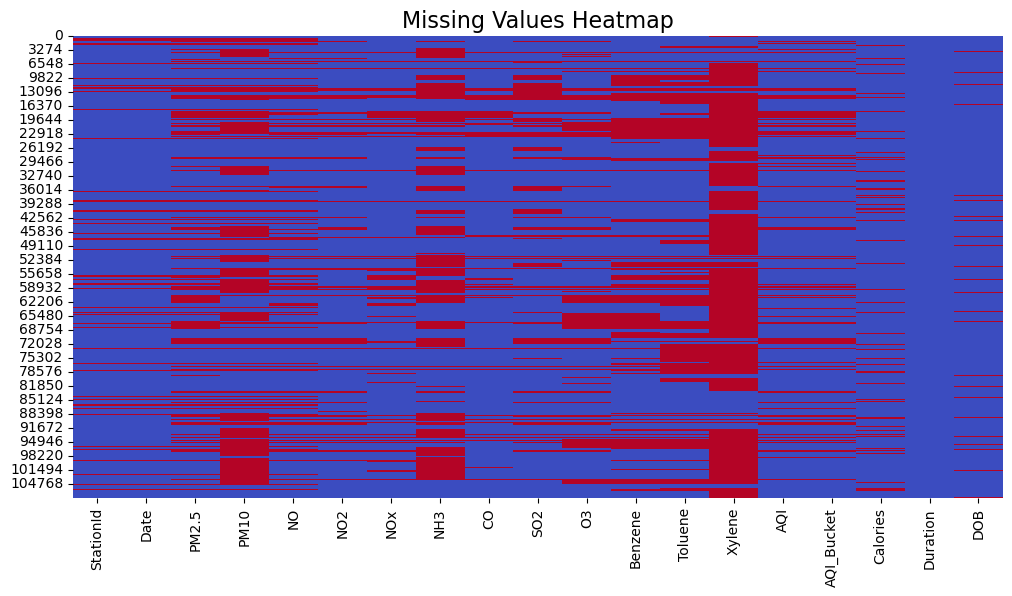

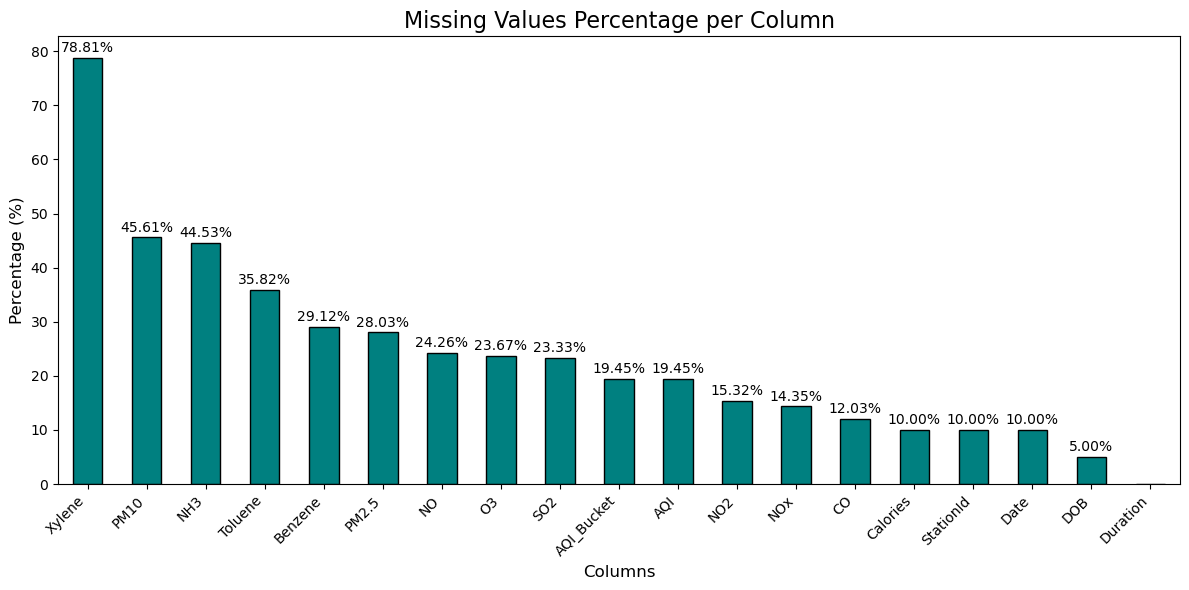

C:\Users\vsr\AppData\Local\Temp\ipykernel_12032\3807261001.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Calories"].replace(np.nan, 130, inplace=True)
C:\Users\vsr\AppData\Local\Temp\ipykernel_12032\3807261001.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Missing values handled successfully!
Duplicate rows before cleaning: 13
Duplicate rows after cleaning: 0
Cleaning complete! Saved as cleaned_station_day.csv
   StationId        Date   PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0      AP001  2017-11-24   71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1      AP001  2017-11-25   81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2      AP001  2017-11-26   78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3      AP001  2017-11-27   88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4      AP001  2017-11-28   64.18  104.09  2.56  28.07  17.01  11.42  0.09   
5      AP001  2017-11-29   72.47  114.84  5.23  23.20  16.59  12.25  0.16   
6      AP001  2017-11-30   69.80  114.86  4.69  20.17  14.54  10.95  0.12   
7      AP001  2017-12-01   73.96  113.56  4.58  19.29  13.97  10.95  0.10   
8      AP001  2017-12-02   89.90  140.20  7.71  26.19  19.87  13.12  0.10   
9      AP001  2017-12-03   87.14  130.52  0.97  21.31  12.12  14.36  0.15

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("station_day_edited_with_missing.csv")
print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# represnting missing value (heatmap)

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

# represnting missing value (bar chart)
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / df.shape[0]) * 100

plt.figure(figsize=(12,6))
ax = missing_percent.plot(kind='bar', color='teal', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 0.5,
            '{:1.2f}%'.format(height),
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.title("Missing Values Percentage per Column", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Different Methods to Clean Data


# 1. Empty Cells / Missing Values

#1.Drop Null Values
df.dropna(inplace=False)

#2.Replace Empty Values with a constant 
df = df.replace(np.nan, 130)

# (2a) Replace Only For Specified Column 
if "Calories" in df.columns:
    df["Calories"].replace(np.nan, 130, inplace=True)

# (2b) Replace Using Mean, Median, or Mode
if "Calories" in df.columns:
    mean_val = np.nanmean(df["Calories"])
    median_val = np.nanmedian(df["Calories"])
    mode_val = df["Calories"].mode()[0]

df["Calories"].fillna(mean_val, inplace=True)
df["Calories"].fillna(median_val, inplace=True)
df["Calories"].fillna(mode_val, inplace=True)

print("Missing values handled successfully!")

#2. Data in Wrong Format 

# 1. Remove rows with missing 'Date' values

df.dropna(subset=['Date'], inplace=True)

# 2.Convert all cells in 'DOB' column into the same datetime format

df['DOB'] = pd.to_datetime(df['DOB'], format="%Y-%m-%d", errors='coerce')

#3. Wrong Data

#  Replace wrong data manually

df.loc[7, 'Duration'] = 45

# Replace values greater than 120 using NumPy

df["Duration"] = np.where(df["Duration"] > 120, 120, df["Duration"])

#  Drop rows with wrong data (Duration > 120)

df = df[df["Duration"] <= 120]

# 4. Duplicates 
print("Duplicate rows before cleaning:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicate rows after cleaning:", df.duplicated().sum())


df.to_csv("cleaned_station_day.csv", index=False)
print("Cleaning complete! Saved as cleaned_station_day.csv")


print(df.head())







